<a href="https://colab.research.google.com/github/Jeremy26/neural_optimization_course/blob/main/Quantization_explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
fp32_values = np.sort(np.random.uniform(low = 0.0, high=5.0, size= (10)))
x_max = np.max(fp32_values)
x_min = np.min(fp32_values)

q_min = 0 
q_max = 255
scale = (x_max - x_min) / (q_max - q_min)
zero_point = np.uint8(q_min - round(x_min / scale))
q_values = (fp32_values / scale).astype(np.uint8) + np.uint8(zero_point)

In [ ]:
print(zero_point)
print(q_values)
print(scale)

248
[255  81 128 140 145 163 188 233 242 254]
0.018882314714521325


In [ ]:
fp32_text = [str(round(x,2)) for x in fp32_values.tolist()]
int8_text = [str(round(x,2)) for x in q_values.tolist()]

In [ ]:
print(fp32_text)
print(int8_text)

['0.14', '1.69', '2.58', '2.8', '2.9', '3.25', '3.7', '4.56', '4.73', '4.96']
['255', '81', '128', '140', '145', '163', '188', '233', '242', '254']


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=np.arange(len(fp32_values)), y=fp32_values, text = fp32_text,
                    mode='markers+text', textposition="top left",
                    name='fp32_values'), row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(q_values)), y=q_values, text = int8_text,
                    mode='markers+text', textposition="bottom right",
                    name='Quantized values'), row=1, col=2)

fig.update_layout(height=500, width=1000, title_text="Quantization - fp32 -> int8 mapping")
fig.show()

In [ ]:
fig.write_html("quantization_mapping.html")

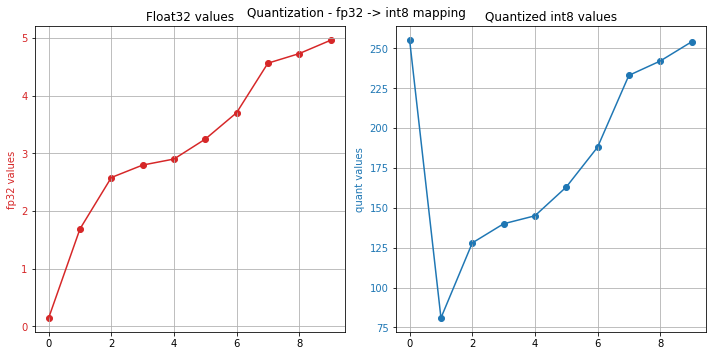

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

ax1_color = 'tab:red'
ax1.set_ylabel('fp32 values', color=ax1_color)
ax1.plot(range(len(fp32_values)), fp32_values, color=ax1_color)
ax1.scatter(range(len(fp32_values)), fp32_values, color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.set_title('Float32 values')
ax1.grid(True)

ax2_color = 'tab:blue'    
ax2.set_ylabel('quant values', color=ax2_color)
ax2.plot(range(len(q_values)), q_values, color=ax2_color)
ax2.scatter(range(len(q_values)), q_values, color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.set_title('Quantized int8 values')
ax2.grid(True)

plt.suptitle('Quantization - fp32 -> int8 mapping')
fig.tight_layout()
plt.show()